<a href="https://colab.research.google.com/github/abookvv/Math-Analysis-FirstYear/blob/main/%D0%A2%D0%B8%D0%BF%D0%BE%D0%B2%D0%B8%D0%BA1_2/%D0%A2%D0%B8%D0%BF%D0%BE%D0%B2%D0%B8%D0%BA1_2%D1%80%D0%B5%D0%B0%D0%BB%D0%B8%D0%B7%D0%B0%D1%86%D0%B8%D1%8F.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import math
from matplotlib import pyplot as plt
from matplotlib.patches import Polygon

In [ ]:
def f(x):
    return np.cos(x)**2
    # return 1/x**2
    # return 1/x**0.5

#вар 17
pi=math.pi
a = 0
b = pi
exact_value = pi/2

# вар 10
# a = 1
# b = 2
# exact_value = 0.5

#вар 41
# a = 1
# b = np.e
# exact_value = 2(е**0.5 - 1)

n_values = [4, 8, 16]

# Метод прямоугольников (средняя точка)
def rectangle_method(f, a, b, n, position='mid'):
    dx = (b - a) / n
    integral = 0.0
    x_points = np.linspace(a, b, n+1)

    fig, ax = plt.subplots(figsize=(10, 6))

    # Строим функцию
    x_fine = np.linspace(a, b, 1000)
    ax.plot(x_fine, f(x_fine), 'r-', linewidth=2, label='f(x) = cos²(x)')

    for i in range(n):
        x_left = x_points[i]
        x_right = x_points[i+1]

        if position == 'left':
            xi = x_left
        elif position == 'right':
            xi = x_right
        elif position == 'mid':
            xi = (x_left + x_right) / 2

        # Вычисляем S прямоугольника
        square = f(xi) * dx
        integral += square

        # Создаем полигон для закрашивания
        verts = [(x_left, 0), (x_left, f(xi)), (x_right, f(xi)), (x_right, 0)]
        poly = Polygon(verts, facecolor='0.9', edgecolor='0.5')
        ax.add_patch(poly)

        # h прямоугольника
        ax.plot([xi, xi], [0, f(xi)], 'b--', linewidth=0.7)

    ax.set_xlim(a, b)
    ax.set_ylim(0, 1.1)
    ax.set_title(f'Метод прямоугольников (n={n}, {position})')
    ax.set_xlabel('x')
    ax.set_ylabel('f(x)')
    ax.legend()
    ax.grid(True)

    plt.show()
    return integral

In [ ]:
# Метод трапеций
def trapezoid_method(f, a, b, n):
    dx = (b - a) / n
    integral = 0.0
    x_points = np.linspace(a, b, n+1)

    fig, ax = plt.subplots(figsize=(10, 6))

    # Строим функцию
    x_fine = np.linspace(a, b, 1000)
    ax.plot(x_fine, f(x_fine), 'r-', linewidth=2, label='f(x) = cos²(x)')

    for i in range(n):
        x_left = x_points[i]
        x_right = x_points[i+1]
        f_left = f(x_left)
        f_right = f(x_right)

        # Вычисляем площадь трапеции
        area = (f_left + f_right) * dx / 2
        integral += area

        # Создаем полигон для закрашивания
        verts = [(x_left, 0), (x_left, f_left), (x_right, f_right), (x_right, 0)]
        poly = Polygon(verts, facecolor='0.9', edgecolor='0.5')
        ax.add_patch(poly)

    ax.set_xlim(a, b)
    ax.set_ylim(0, 1.1)
    ax.set_title(f'Метод трапеций (n={n})')
    ax.set_xlabel('x')
    ax.set_ylabel('f(x)')
    ax.legend()
    ax.grid(True)

    plt.show()
    return integral


In [ ]:
def simpson_method(f, a, b, n):
    if n % 2 != 0:
        n += 1  # для метода нужно четное n

    dx = (b - a) / n
    integral = 0.0
    x_points = np.linspace(a, b, n+1)

    fig, ax = plt.subplots(figsize=(10, 6))

    # Рисуем саму функцию
    x_fine = np.linspace(a, b, 1000)
    ax.plot(x_fine, f(x_fine), 'r-', linewidth=2, label='f(x) = cos²(x)')

    for i in range(0, n, 2):
        x0 = x_points[i]
        x1 = x_points[i+1]
        x2 = x_points[i+2]

        # Вычисляем площадь по методу Симпсона (для двух интервалов)
        square = (f(x0) + 4*f(x1) + f(x2)) * dx / 3 # делим на 3 тк n взяли четным
        integral += square

        # Создаем полигон для закрашивания (парабола)
        x_parabola = np.linspace(x0, x2, 100)

        # Коэффициенты параболы
        A = (f(x0) - 2*f(x1) + f(x2)) / (2*dx**2)
        B = (f(x2) - f(x0)) / (2*dx)
        C = f(x1)
        y_parabola = A*(x_parabola - x1)**2 + B*(x_parabola - x1) + C

        verts = [(x0, 0)] + list(zip(x_parabola, y_parabola)) + [(x2, 0)]
        poly = Polygon(verts, facecolor='0.9', edgecolor='0.5')
        ax.add_patch(poly)

    ax.set_xlim(a, b)
    ax.set_ylim(0, 1.1)
    ax.set_title(f'Метод Симпсона (n={n})')
    ax.set_xlabel('x')
    ax.set_ylabel('f(x)')
    ax.legend()
    ax.grid(True)

    plt.show()
    return integral


Метод прямоугольников (средняя точка), n=4


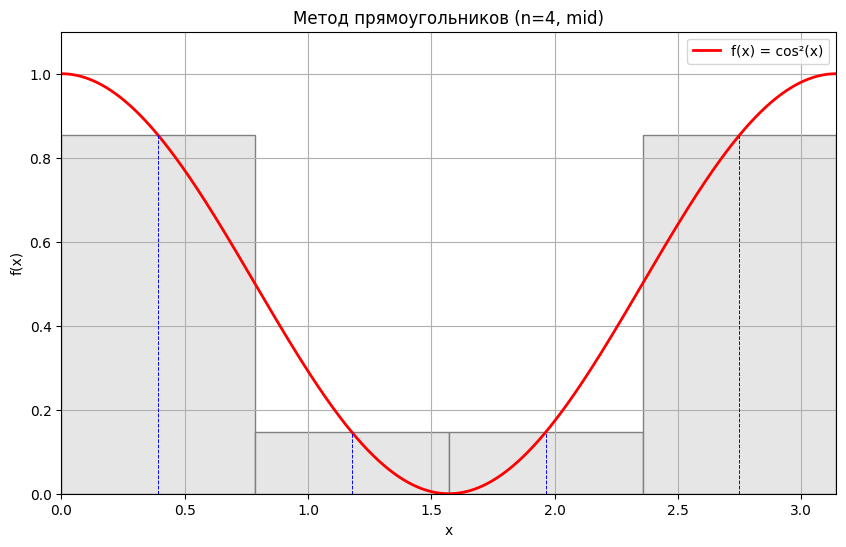

Приближенное значение интеграла: 1.570796

Метод трапеций, n=4


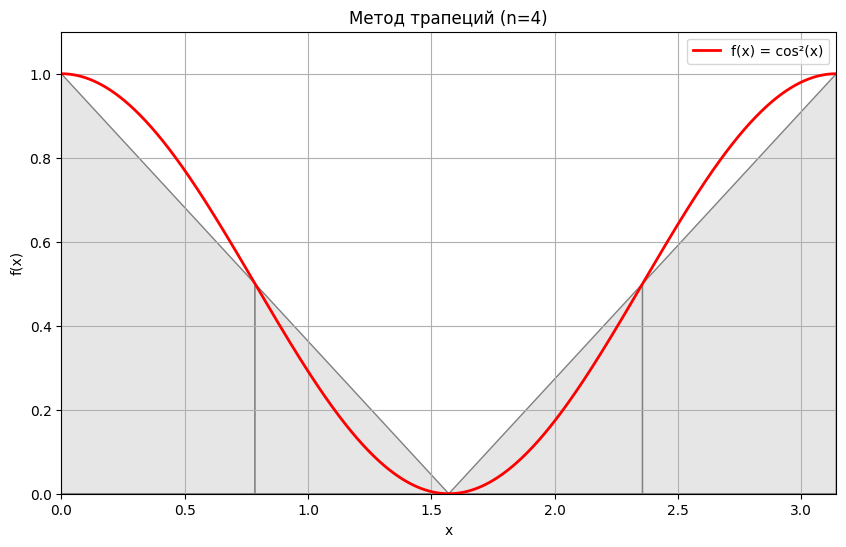

Приближенное значение интеграла: 1.570796

Метод Симпсона, n=4


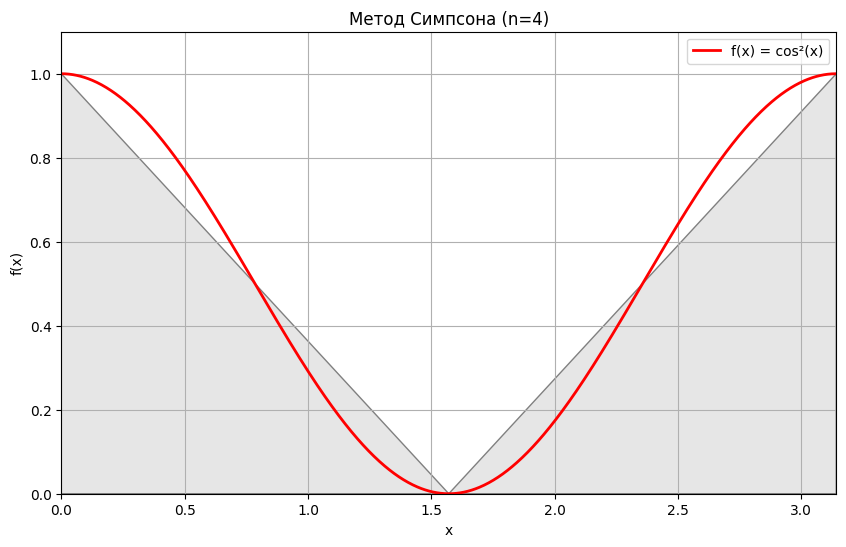

Приближенное значение интеграла: 1.570796

Метод прямоугольников (средняя точка), n=8


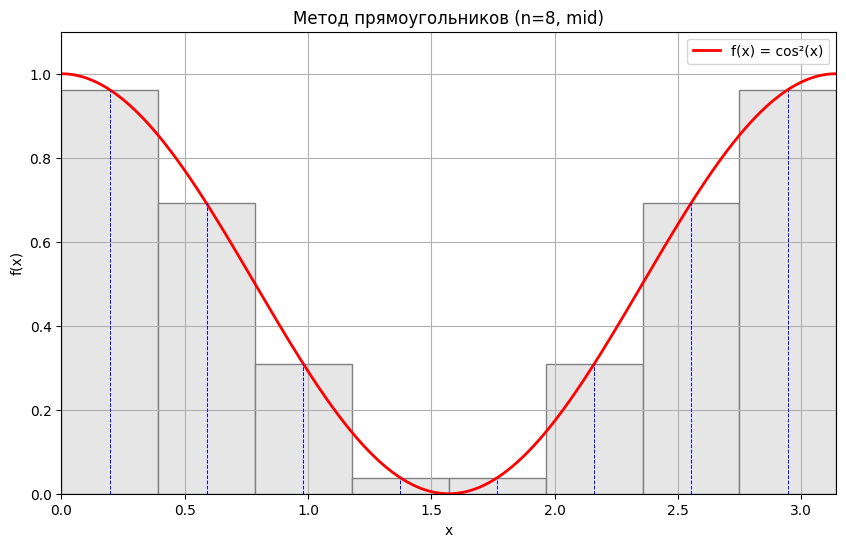

Приближенное значение интеграла: 1.570796

Метод трапеций, n=8


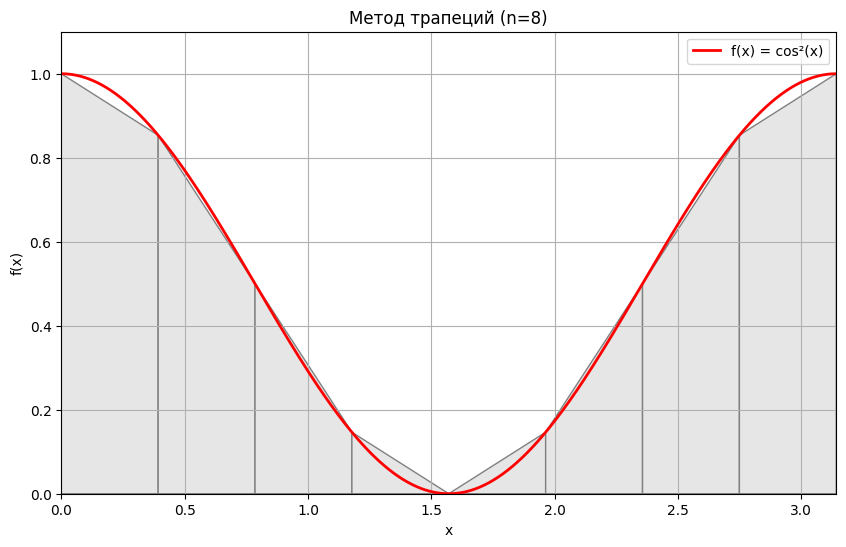

Приближенное значение интеграла: 1.570796

Метод Симпсона, n=8


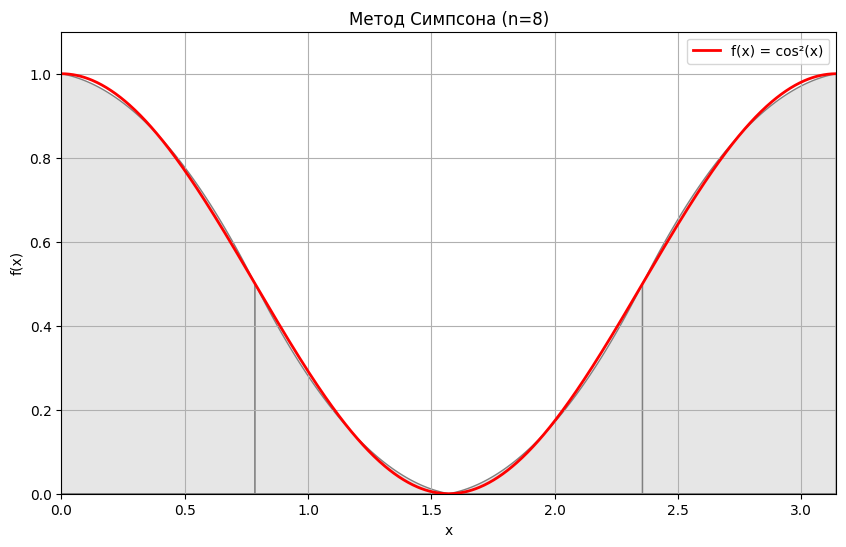

Приближенное значение интеграла: 1.570796

Метод прямоугольников (средняя точка), n=16


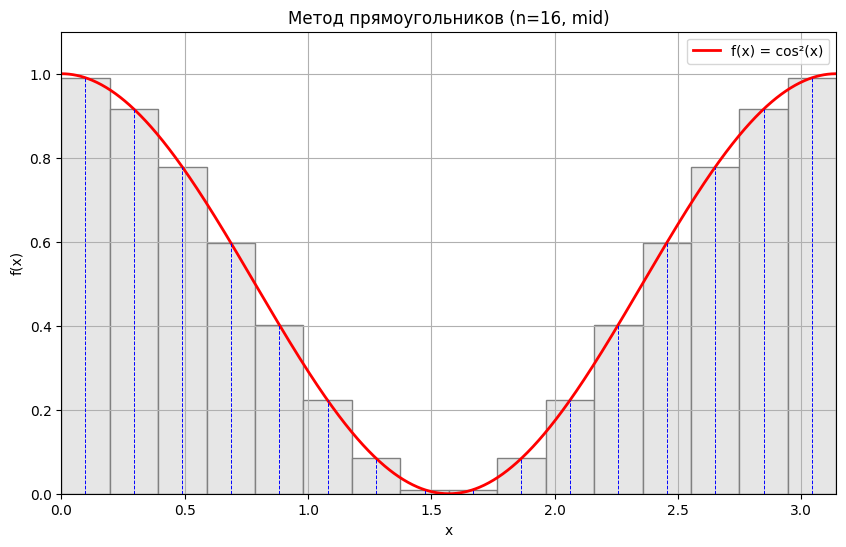

Приближенное значение интеграла: 1.570796

Метод трапеций, n=16


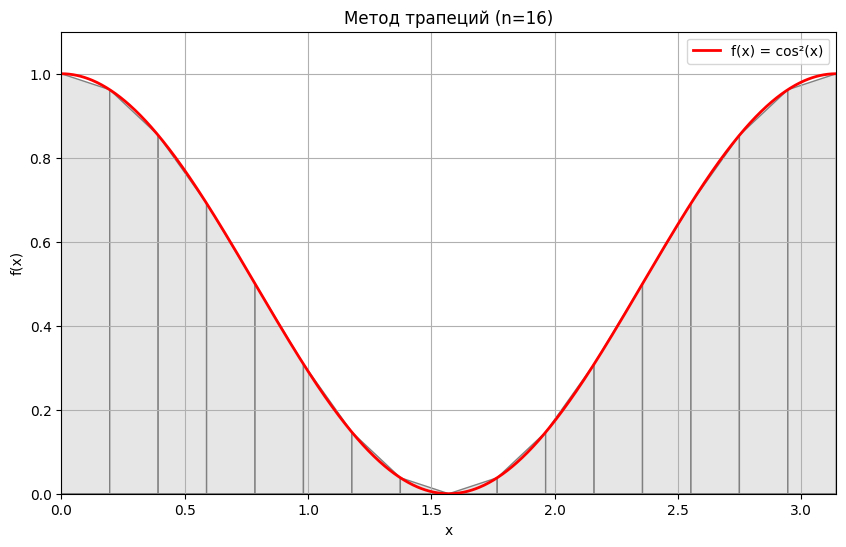

Приближенное значение интеграла: 1.570796

Метод Симпсона, n=16


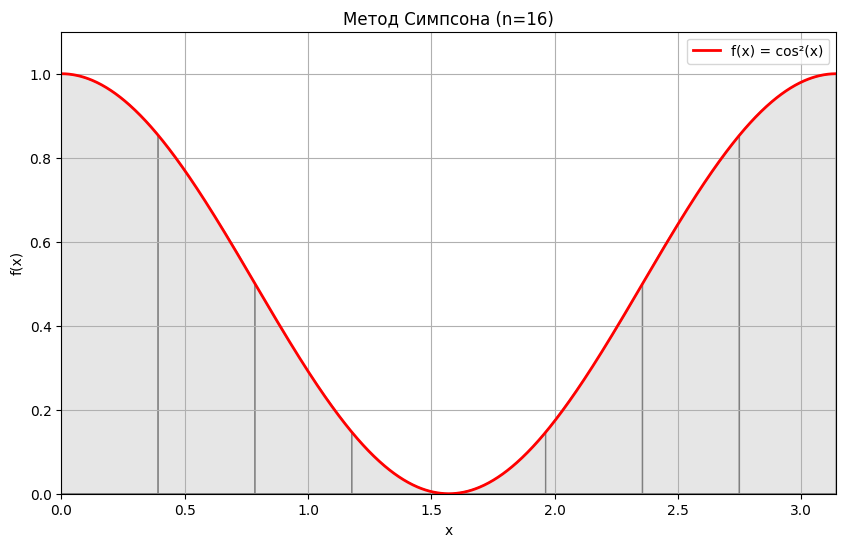

Приближенное значение интеграла: 1.570796


In [ ]:
# вычисление и визуализация каждого метода
for n in n_values:
    print(f"\nМетод прямоугольников (средняя точка), n={n}")
    integral = rectangle_method(f, a, b, n, 'mid')
    print(f"Приближенное значение интеграла: {integral:.6f}")

    print(f"\nМетод трапеций, n={n}")
    integral = trapezoid_method(f, a, b, n)
    print(f"Приближенное значение интеграла: {integral:.6f}")

    print(f"\nМетод Симпсона, n={n}")
    integral = simpson_method(f=f, a=a, b=b, n=n)
    print(f"Приближенное значение интеграла: {integral:.6f}")

In [ ]:
n_values = [1, 2, 4, 8, 16, 32, 64, 128]

def compute_errors(method, f, a, b, n_values):
    """Вычисляет MAE и MSE для метода"""
    approx = np.array([method(f, a, b, n) for n in n_values])
    errors = np.abs(approx - exact_value)
    return errors, errors**2  # MAE, MSE


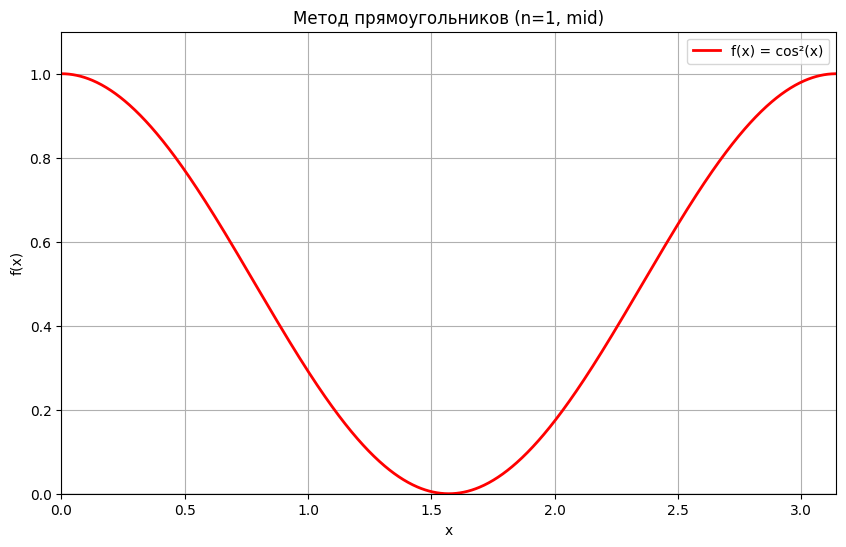

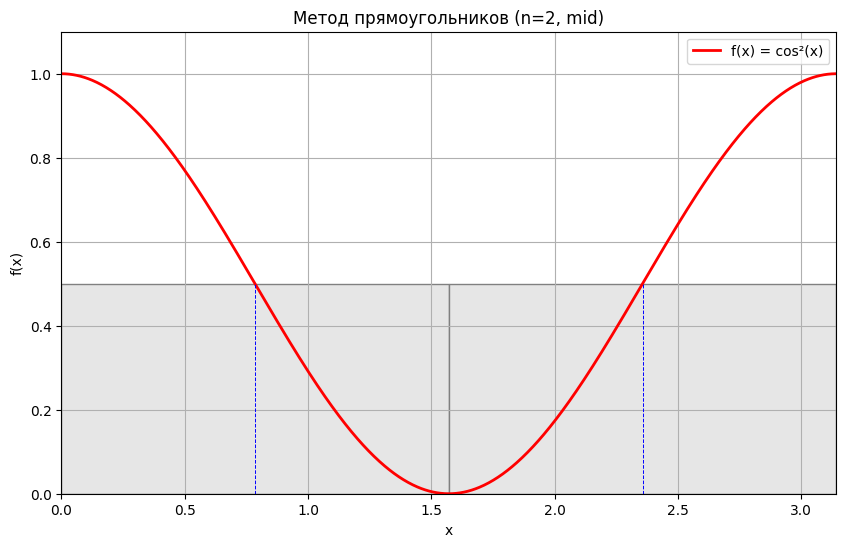

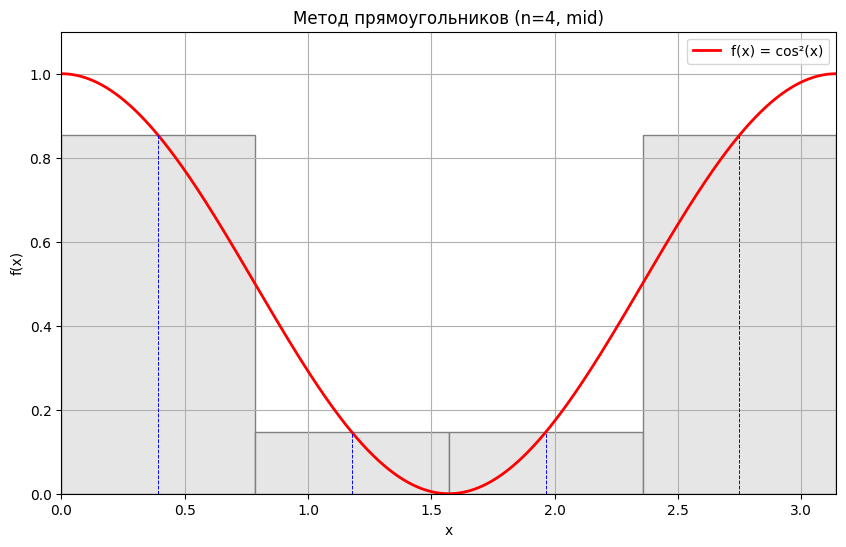

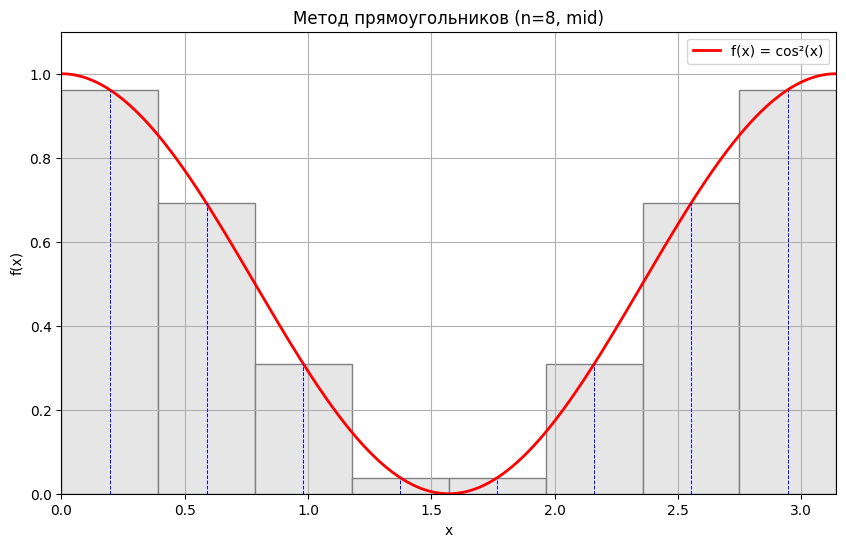

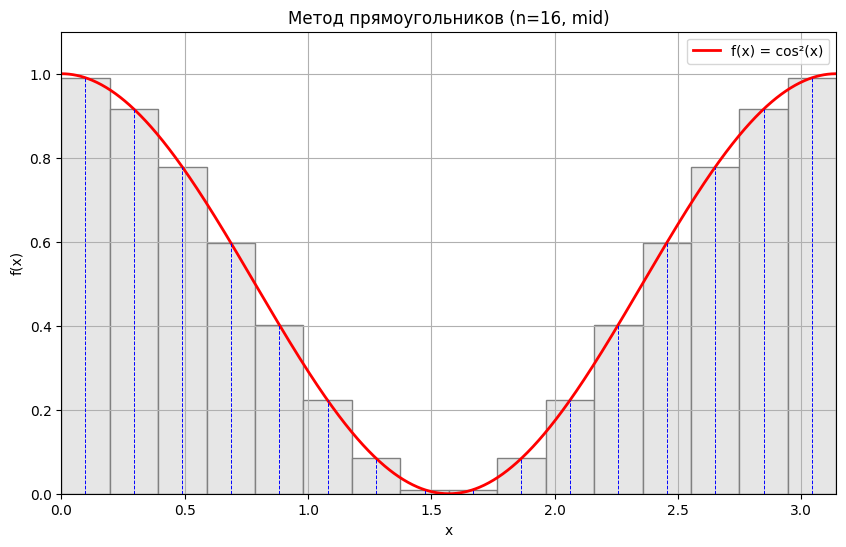

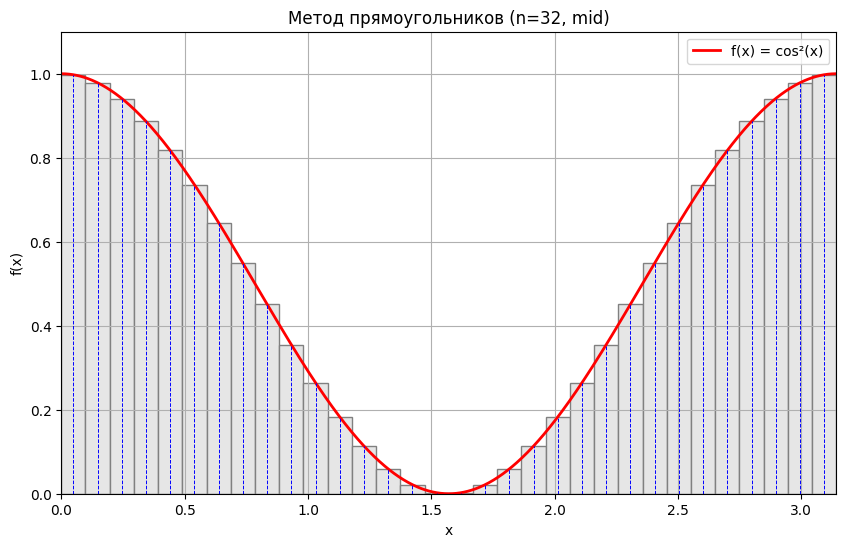

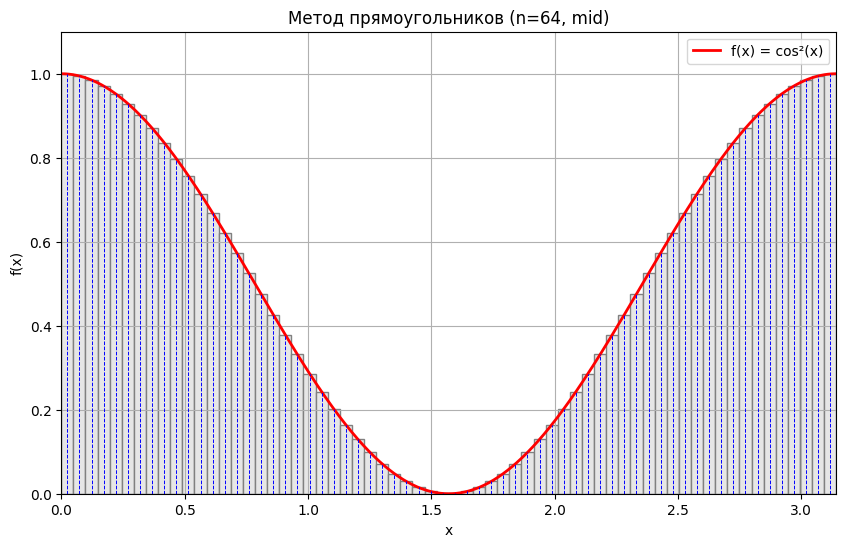

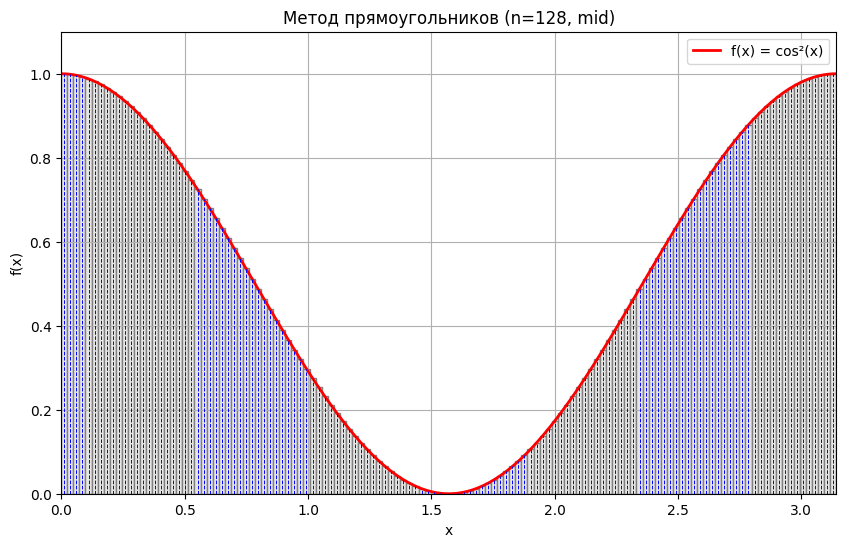

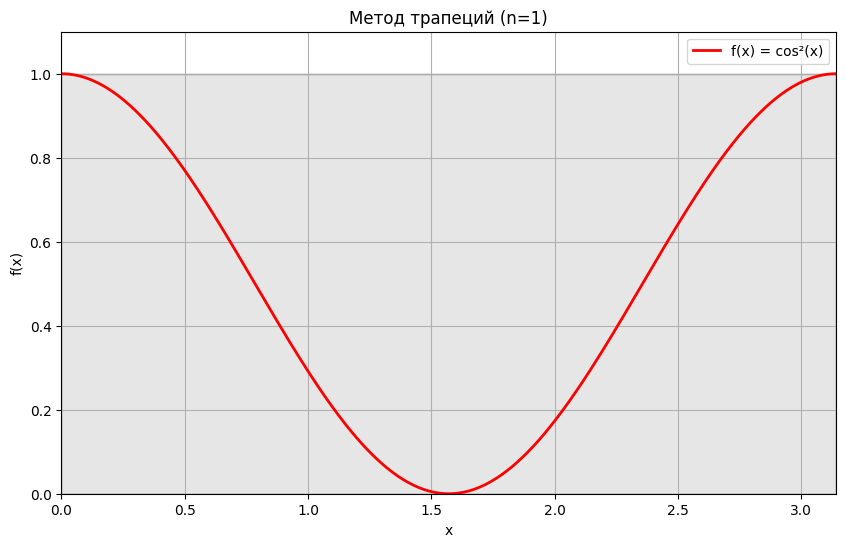

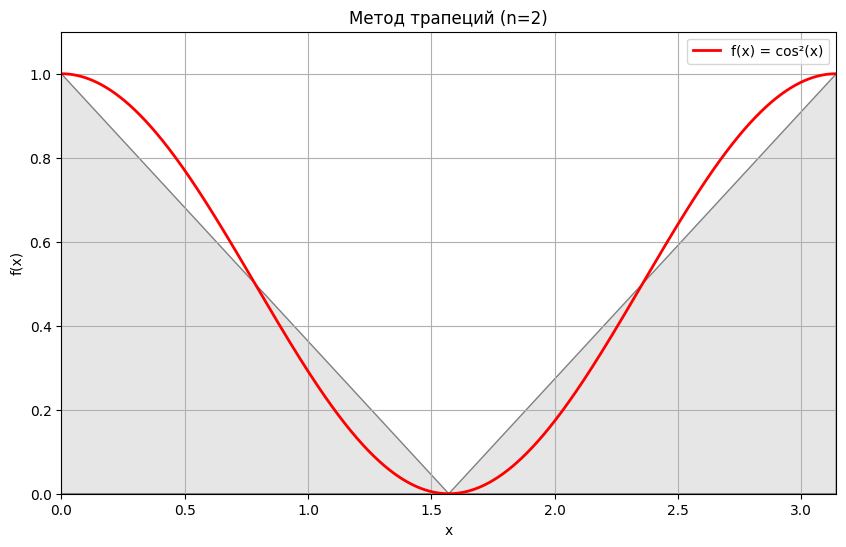

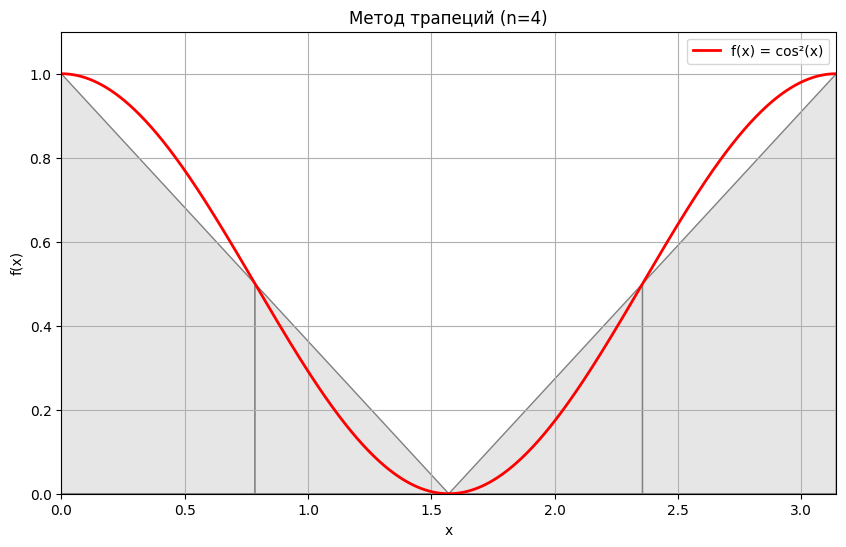

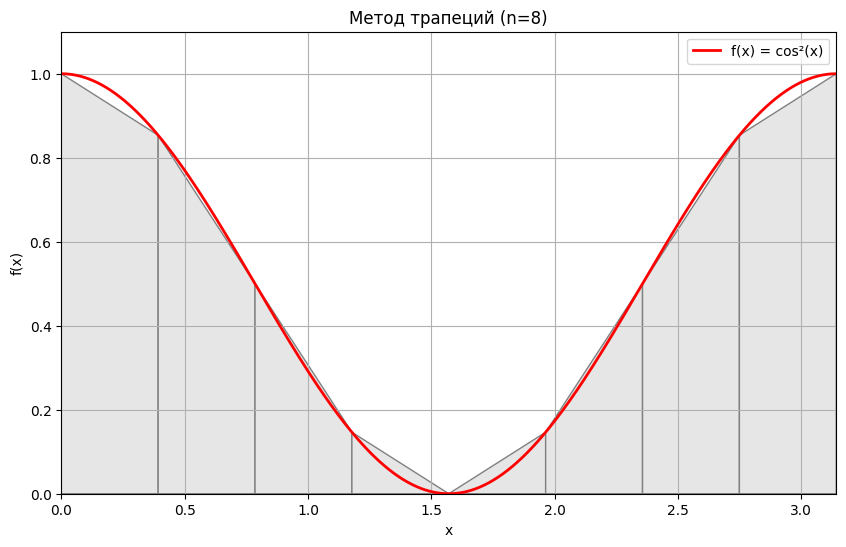

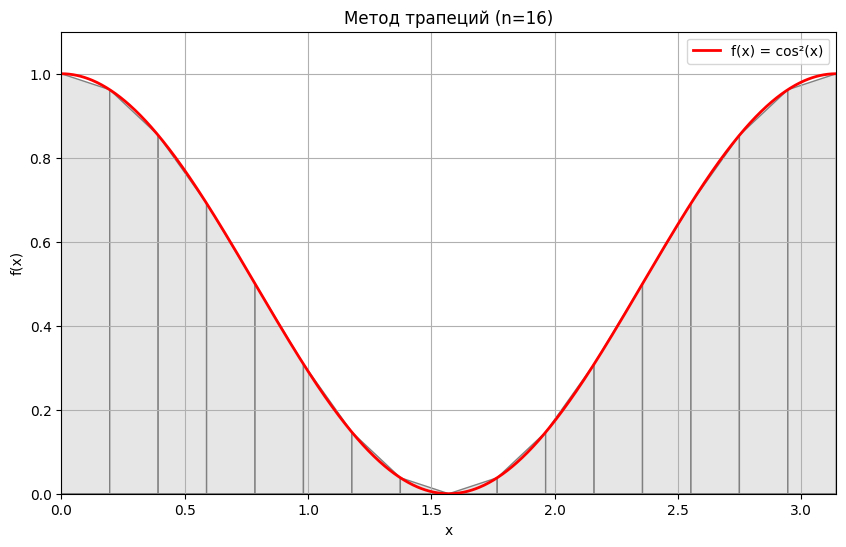

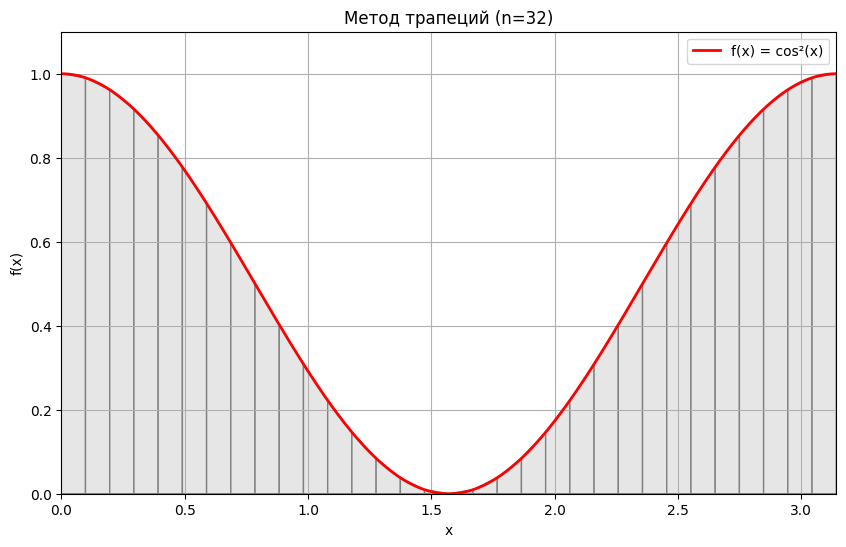

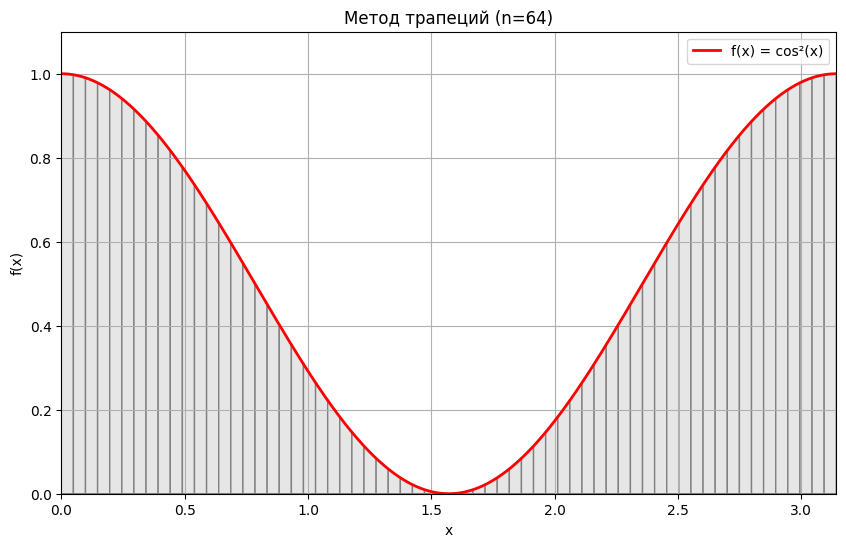

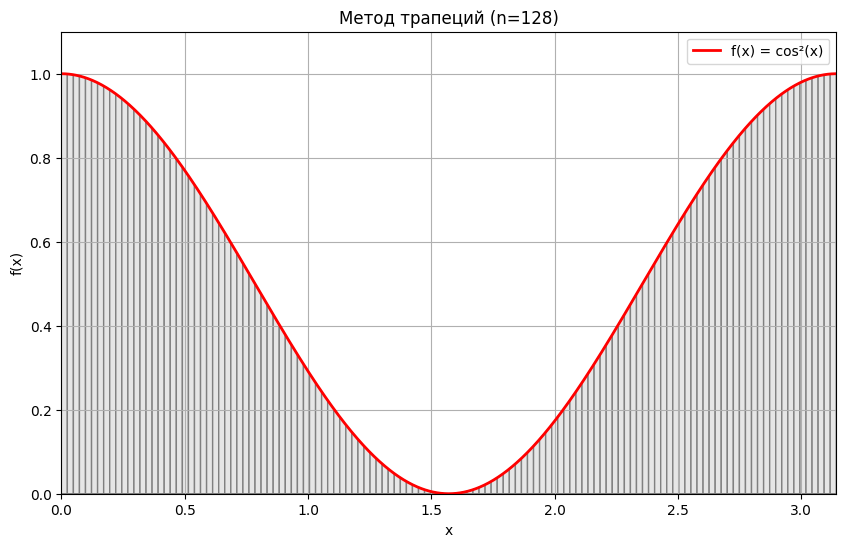

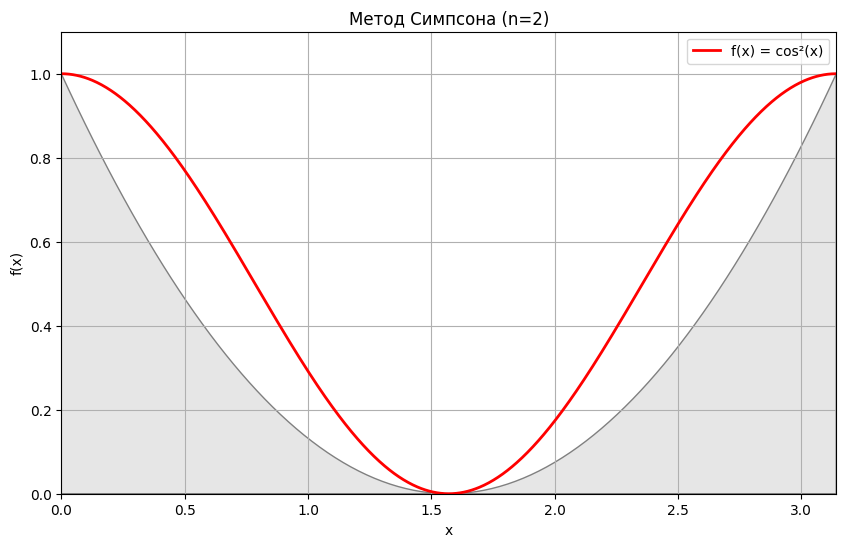

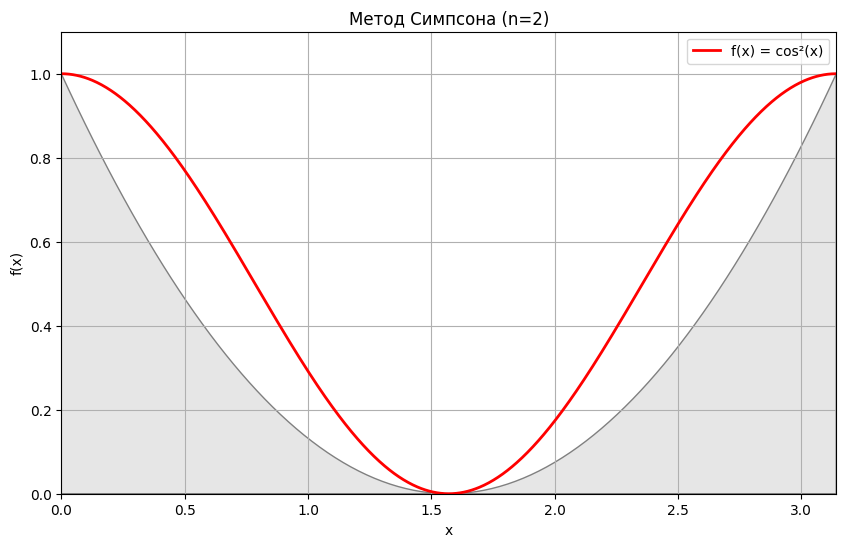

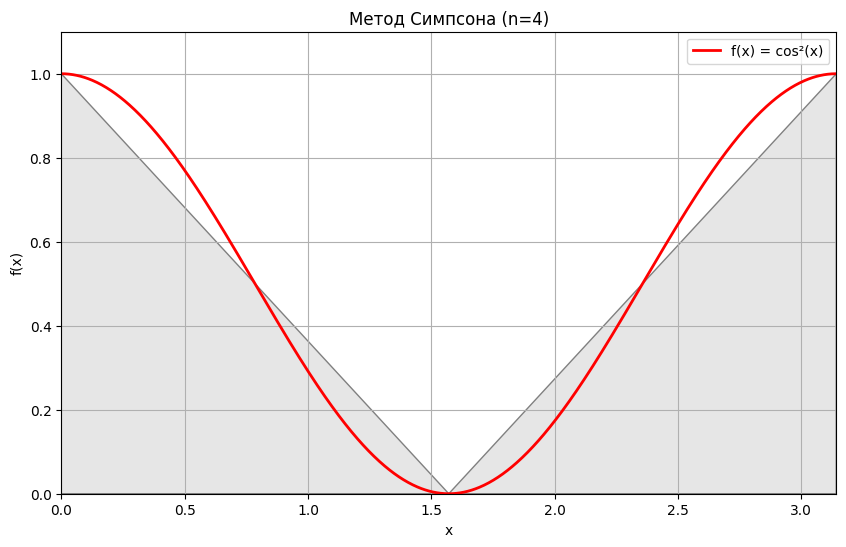

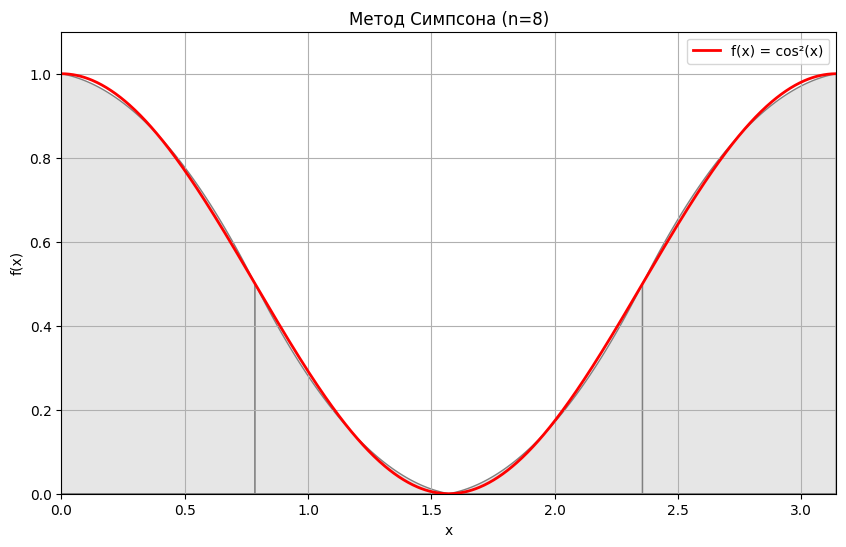

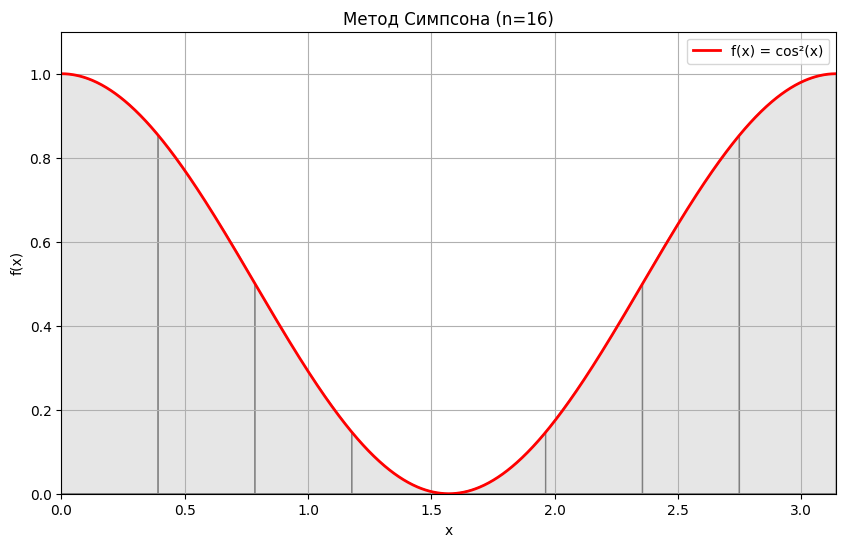

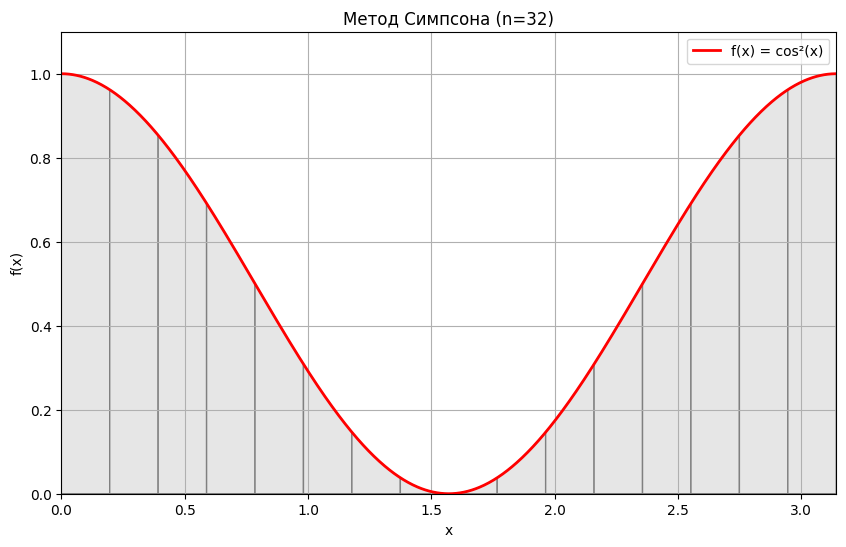

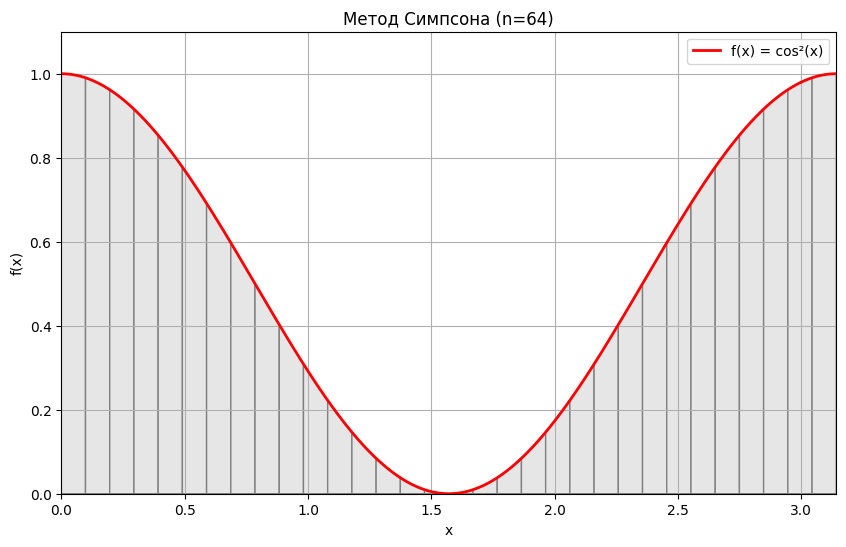

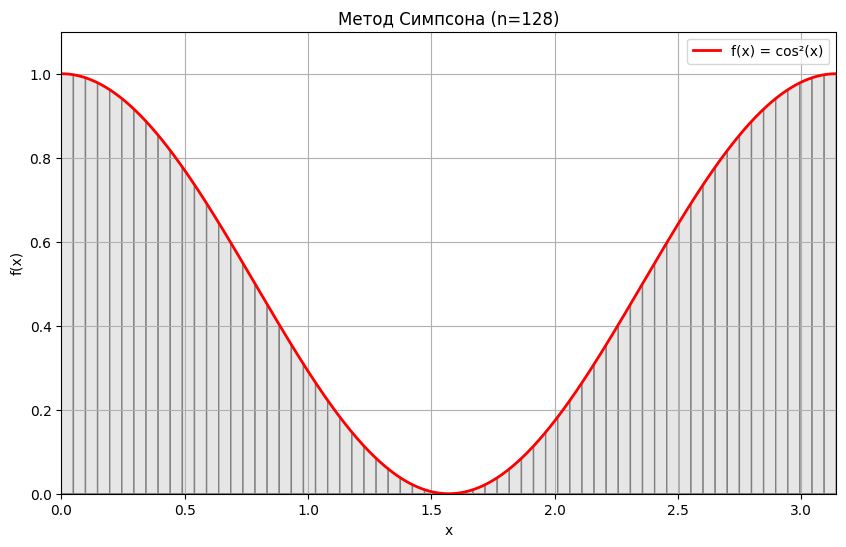

In [ ]:
# Вычисляем ошибки для всех методов
rect_mae, rect_mse = compute_errors(rectangle_method, f, a, b, n_values)
trap_mae, trap_mse = compute_errors(trapezoid_method, f, a, b, n_values)
simp_mae, simp_mse = compute_errors(simpson_method, f, a, b, n_values)

МАЕ для прямоугольников: [1.57079633e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 2.22044605e-16 4.44089210e-16]
МАЕ для трапеций: [1.57079633e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 2.22044605e-16 0.00000000e+00]
МАЕ для Симпсона: [5.23598776e-01 5.23598776e-01 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 2.22044605e-16 0.00000000e+00]


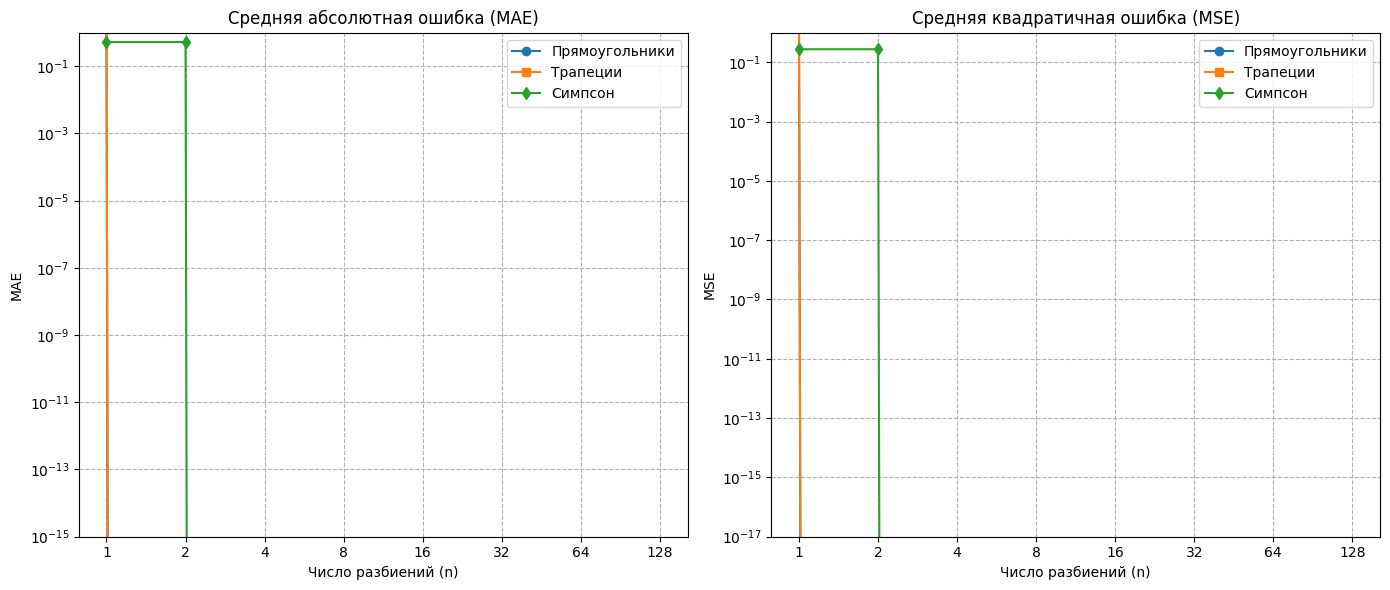

МSЕ для прямоугольников: [2.46740110e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 4.93038066e-32 1.97215226e-31]
МSЕ для трапеций: [2.46740110e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 4.93038066e-32 0.00000000e+00]
МSЕ для Симпсона: [2.74155678e-01 2.74155678e-01 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 4.93038066e-32 0.00000000e+00]


In [ ]:
# Отклонения

plt.figure(figsize=(14, 6))

# График MAE
plt.subplot(1, 2, 1)
plt.plot(n_values, rect_mae, 'o-', label='Прямоугольники')
plt.plot(n_values, trap_mae, 's-', label='Трапеции')
plt.plot(n_values, simp_mae, 'd-', label='Симпсон')
plt.xscale('log', base=2) # используем логарифмическую шкалу,
plt.yscale('log')         #чтобы увидеть как меняется порядок ошибки
plt.ylim(top=1, bottom=1e-15)  # Исключаем "скачок" до 2.22e-16, чтобы не искажать результаты
plt.xticks(n_values, labels=n_values)
plt.xlabel('Число разбиений (n)')
plt.ylabel('MAE')
plt.title('Средняя абсолютная ошибка (MAE)')
plt.grid(True, which="both", ls="--")
plt.legend()
print("МАЕ для прямоугольников:", rect_mae)
print("МАЕ для трапеций:", trap_mae)
print("МАЕ для Симпсона:", simp_mae)

# График MSE
plt.subplot(1, 2, 2)
plt.plot(n_values, rect_mse, 'o-', label='Прямоугольники')
plt.plot(n_values, trap_mse, 's-', label='Трапеции')
plt.plot(n_values, simp_mse, 'd-', label='Симпсон')
plt.xscale('log', base=2)
plt.yscale('log')
plt.ylim(top=1, bottom=1e-17)  # Исключаем "скачок" до 2.22e-16
plt.xticks(n_values, labels=n_values)
plt.xlabel('Число разбиений (n)')
plt.ylabel('MSE')
plt.title('Средняя квадратичная ошибка (MSE)')
plt.grid(True, which="both", ls="--")
plt.legend()

plt.tight_layout()
plt.show()

print("МSЕ для прямоугольников:", rect_mse)
print("МSЕ для трапеций:", trap_mse)
print("МSЕ для Симпсона:", simp_mse)

3.
